In [ ]:
import csv
import pandas as pd
import regex as re
import numpy as np
import scipy 

In [ ]:
war=pd.read_csv('war_dataset.csv')
politics = pd.read_csv('politics_dataset.csv')
religion = pd.read_csv('religion_dataset.csv')
crisis = pd.read_csv('crisis_dataset.csv')
health = pd.read_csv('health.csv',encoding='cp1252')

data=[war,politics,religion,crisis,health]

In [ ]:
health.head()

,ID,Tweet content,User,Urls list,Hyperlinks_exist,Media_exists,Hashtags list,@ list,ID.1,created_at,Compound,Subjectivity,Favorites_count,Retweet_count,Replies count,Classification,Sentiment
0,1,The best way to protect yourself is to get vac...,DrTedros,NaN,no,yes,COVID19,NaN,1514356055794458628,2022-04-13 21:33:13+00:00,0.936,0.6000000000000001,708,359,224,Misinformation,positive
1,ID,Tweet content,User,Urls list,Hyperlinks_exist,Media_exists,Hashtags list,@ list,ID,created_at,Compound,Subjectivity,Favorites_count,Retweet_count,Replies count,Classification,Sentiment
2,1,The best way to protect yourself is to get vac...,DrTedros,NaN,no,yes,COVID19,NaN,1514356055794458628,2022-04-13 21:33:13+00:00,0.936,0.6000000000000001,708,359,224,Misinformation,positive
3,2,This is only nominally about the #GridironDinn...,gregggonsalves,https://www.thenation.com/article/society/covi...,yes,no,GridironDinner COVID19,NaN,1514566936637722625,2022-04-14 11:31:11+00:00,-0.128,0.4694444444444444,674,213,31,Information,neutral
4,3,This new study on household transmission of #C...,apsmunro,https://www.cmajopen.ca/content/10/2/E357,yes,no,COVID19,NaN,1514583669310115842,2022-04-14 12:37:41+00:00,0.7096,0.383982683982684,464,169,18,Information,positive


In [ ]:
li=['war','politics','religion','crisis','health']

In [ ]:

dat = dict()

for j in range(len(data)):
  icn,mcn=0,0
  info,mis=[],[]
  iretweets,ireplies,ifavourites = 0,0,0
  mretweets,mreplies,mfavourites = 0,0,0

  for i in range(len(data[j])):
    if(data[j].loc[i]['Classification'] == 'Information'):
      icn+=1
      info.append(data[j].loc[i])
      iretweets+=int(data[j].loc[i]['Retweet_count'])
      ireplies+=int(data[j].loc[i]['Replies count'])
      ifavourites+=int(data[j].loc[i]['Favorites_count'])


    elif(data[j].loc[i]['Classification']=='Misinformation'):
      mcn+=1
      mis.append(data[j].loc[i])
      mretweets+=int(data[j].loc[i]['Retweet_count'])
      mreplies+=int(data[j].loc[i]['Replies count'])
      mfavourites+=int(data[j].loc[i]['Favorites_count'])

  print(icn,mcn)
  print(iretweets,ireplies,ifavourites,mretweets,mreplies,mfavourites)

  dat[li[j]]=[iretweets,ireplies,ifavourites,mretweets,mreplies,mfavourites]


46 9
31389 9806 164039 8438 1548 27809
74 18
4907 1047 17194 1647 89 4171
47 30
61088 12706 214590 27585 4073 108388
50 10
206891 31295 638706 8196 777 25161
39 7
4886 1966 16810 5026 3107 22169


In [ ]:
dat

{'crisis': [206891, 31295, 638706, 8196, 777, 25161],
 'health': [4886, 1966, 16810, 5026, 3107, 22169],
 'politics': [4907, 1047, 17194, 1647, 89, 4171],
 'religion': [61088, 12706, 214590, 27585, 4073, 108388],
 'war': [31389, 9806, 164039, 8438, 1548, 27809]}

In [ ]:
##TRUE DATA

li=[['crisis',len(crisis)]+dat['crisis'][:3],['health',len(health)]+dat['health'][:3],['politics',len(politics)]+dat['politics'][:3], ['religion',len(religion)]+dat['religion'][:3],['war',len(war)]+dat['war'][:3] ]
true_df= pd.DataFrame(li, columns=('topic','number','retweets','favourites','comments'))


In [ ]:
true_df

,topic,number,retweets,favourites,comments
0,crisis,60,206891,31295,638706
1,health,50,4886,1966,16810
2,politics,92,4907,1047,17194
3,religion,77,61088,12706,214590
4,war,55,31389,9806,164039


In [ ]:
##TRUE DATA

li2=[['crisis',len(crisis)]+dat['crisis'][3:],['health',len(health)]+dat['health'][3:],['politics',len(politics)]+dat['politics'][3:], ['religion',len(religion)]+dat['religion'][3:],['war',len(war)]+dat['war'][3:] ]
mis_df= pd.DataFrame(li2, columns=('topic','number','retweets','favourites','comments'))


In [ ]:
print(true_df)
print('')
print('')
print('')
print(mis_df)

      topic  number  retweets  favourites  comments
0    crisis      60    206891       31295    638706
1    health      50      4886        1966     16810
2  politics      92      4907        1047     17194
3  religion      77     61088       12706    214590
4       war      55     31389        9806    164039



      topic  number  retweets  favourites  comments
0    crisis      60      8196         777     25161
1    health      50      5026        3107     22169
2  politics      92      1647          89      4171
3  religion      77     27585        4073    108388
4       war      55      8438        1548     27809


In [ ]:
##### ACTUAL T TEST #########

####True info
from scipy.stats import skew
from scipy.stats import kurtosis

retweet_sum=0
favourite_sum=0
comment_sum=0

li1=[i for i in true_df['retweets']]
rn1=len(li1)
retweet_sum=sum(li1)
retweet_min=min(li1)
retweet_max = max(li1)
retweet_std = np.std(li1)
retweet_skew = skew(li1, axis=0, bias=False)
retweet_kurtosis= kurtosis(li1, axis=0,fisher=True, bias=True)


li2=[i for i in true_df['favourites']]
fn1=len(li2)
favourite_sum = sum(li2)
favourite_min = min(li2)
favourite_max = max(li2)
favourite_std = np.std(li2)
favourite_skew = skew(li2, axis=0, bias=False)
favourite_kurtosis= kurtosis(li2, axis=0,fisher=True, bias=True)

li3=[i for i in true_df['comments']]
cn1=len(li3)
comment_sum = sum(li3)
comment_min = min(li3)
comment_max = max(li3)
comment_std=np.std(li3)
comment_skew = skew(li3, axis=0, bias=False)
comment_kurtosis= kurtosis(li3, axis=0,fisher=True, bias=True)

retweet_mean = retweet_sum/len(true_df['retweets'])
favourite_mean = favourite_sum/len(true_df['favourites'])
comment_mean = comment_sum/len(true_df['comments'])

print(retweet_mean, retweet_max, retweet_min, retweet_std,retweet_skew, retweet_kurtosis)
print(favourite_mean, favourite_max, favourite_min,favourite_std, favourite_skew, favourite_kurtosis)
print(comment_mean, comment_max, comment_min,comment_std,comment_skew, comment_kurtosis)

61832.2 206891 4886 75435.72867918755 1.843973978138199 -0.13026421784692088
11364.0 31295 1047 10920.036465140582 1.3709684363014596 -0.5113321895104144
210267.8 638706 16810 228218.5300140197 1.6079759832336054 -0.3097845927341063


In [ ]:
### Mis info
mis_retweet_sum=0
mis_favourite_sum=0
mis_comment_sum=0

li1=[i for i in mis_df['retweets']]
rn2=len(li1)
mis_retweet_sum=sum(li1)
mis_retweet_min=min(li1)
mis_retweet_max = max(li1)
mis_retweet_std = np.std(li1)
mis_retweet_skew = skew(li1, axis=0, bias=False)
mis_retweet_kurtosis= kurtosis(li1, axis=0,fisher=True, bias=True)


li2=[i for i in mis_df['favourites']]
fn2=len(li2)
mis_favourite_sum = sum(li2)
mis_favourite_min = min(li2)
mis_favourite_max = max(li2)
mis_favourite_std = np.std(li2)
mis_favourite_skew = skew(li2, axis=0, bias=False)
mis_favourite_kurtosis= kurtosis(li2, axis=0,fisher=True, bias=True)

li3=[i for i in mis_df['comments']]
cn2=len(li3)
mis_comment_sum = sum(li3)
mis_comment_min = min(li3)
mis_comment_max = max(li3)
mis_comment_std=np.std(li3)
mis_comment_skew = skew(li3, axis=0, bias=False)
mis_comment_kurtosis= kurtosis(li3, axis=0,fisher=True, bias=True)

mis_retweet_mean = mis_retweet_sum/len(mis_df['retweets'])
mis_favourite_mean = mis_favourite_sum/len(mis_df['favourites'])
mis_comment_mean = mis_comment_sum/len(mis_df['comments'])

print(mis_retweet_mean, mis_retweet_max, mis_retweet_min, mis_retweet_std,mis_retweet_skew, mis_retweet_kurtosis)
print(mis_favourite_mean, mis_favourite_max, mis_favourite_min,mis_favourite_std, mis_favourite_skew, mis_favourite_kurtosis)
print(mis_comment_mean, mis_comment_max, mis_comment_min,mis_comment_std,mis_comment_skew, mis_comment_kurtosis)

10178.4 27585 1647 9047.43761735885 1.8128846241684602 -0.07989379547249742
1918.8 4073 89 1472.5328383435121 0.37426622566726514 -1.4492180543033437
37539.6 108388 4171 36378.91946498686 1.9322149624749623 0.02872615180412552


In [ ]:
## T-TEST
import math

rsignal = abs(retweet_mean - mis_retweet_mean)
rnoise = (pow(retweet_std,2)/rn1)+(pow(mis_retweet_std,2)/rn2)
rt = rsignal / math.sqrt(rnoise)

fsignal = abs(favourite_mean - mis_favourite_mean)
fnoise = (pow(favourite_std,2)/fn1)+(pow(mis_favourite_std,2)/fn2)
ft = fsignal / math.sqrt(fnoise)

csignal = abs(comment_mean - mis_comment_mean)
cnoise = (pow(comment_std,2)/cn1)+(pow(mis_comment_std,2)/cn2)
ct = csignal / math.sqrt(cnoise)


In [ ]:
#### T-VALS

print(rt,rnoise,rsignal)
print(ft,fnoise,fsignal)
print(ct,cnoise,csignal)

1.5202285027324416 1154481057.7599998 51653.799999999996
1.9167214629821783 24283109.872 9445.2
1.6712778477248056 10681424644.640001 172728.19999999998


In [ ]:
##let p val be 0.05
#degree_of_freedom =df 
df_r = rn1+rn2-2
print(df_r)

8


In [ ]:
##DATA of TRUE

rdata=[["Mean",retweet_mean,mis_retweet_mean,favourite_mean, mis_favourite_mean, comment_mean, mis_comment_mean],
       ["Max", retweet_max,mis_retweet_max,favourite_mean, mis_favourite_mean, comment_mean, mis_comment_mean],
       ["Min",retweet_min,mis_retweet_min, favourite_min, mis_favourite_min, comment_min, mis_comment_min],
       ["Std",retweet_std,mis_retweet_std, favourite_std, mis_favourite_std, comment_std, mis_comment_std],
       ["Skew",retweet_skew,mis_retweet_skew, favourite_skew, mis_favourite_skew, comment_skew, mis_comment_skew],
       ["Kurtosis",retweet_kurtosis,mis_retweet_kurtosis, favourite_kurtosis,mis_favourite_kurtosis, comment_kurtosis, mis_comment_kurtosis]]
ttest= pd.DataFrame(rdata,columns=["Attribute","Retweet true info","Retweet misinfo", "Favourite true info","Favourite misinfo", "Comments true info","Comments misinfo"])
ttest=ttest.reset_index(level=0,drop='True')

finale=pd.DataFrame(li)

In [ ]:
ttest

,Attribute,Retweet true info,Retweet misinfo,Favourite true info,Favourite misinfo,Comments true info,Comments misinfo
0,Mean,61832.200000,10178.400000,11364.000000,1918.800000,210267.800000,37539.600000
1,Max,206891.000000,27585.000000,11364.000000,1918.800000,210267.800000,37539.600000
2,Min,4886.000000,1647.000000,1047.000000,89.000000,16810.000000,4171.000000
3,Std,75435.728679,9047.437617,10920.036465,1472.532838,228218.530014,36378.919465
4,Skew,1.843974,1.812885,1.370968,0.374266,1.607976,1.932215
5,Kurtosis,-0.130264,-0.079894,-0.511332,-1.449218,-0.309785,0.028726


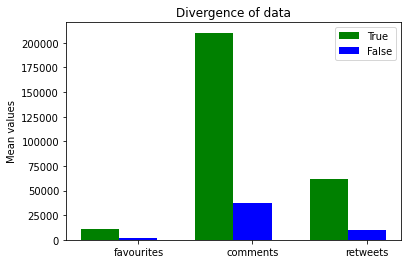

In [ ]:
#####TAbles and graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

td=[favourite_mean, comment_mean, retweet_mean]
md=[mis_favourite_mean, mis_comment_mean, mis_retweet_mean]

 
# x-coordinates of left sides of bars
left = [1,4,7]
left2=[2,5,8]
bar_width = 0.35
 
# labels for bars
tick_label = ["favourites","comments","retweets"]
 
# plotting a bar chart
plt.bar(left, td, tick_label = tick_label, width = 1, color = 'green', label='True')
plt.bar(left2, md, tick_label = tick_label, width = 1, color = 'blue',label='False')


# naming the y-axis
plt.ylabel('Mean values')
# plot title
plt.title("Divergence of data")
plt.legend()
plt.show()


OBSERVATIONS

Mean, variance,std = all explain diffusion characterisitcs
<br>
Ideal: significant difference in a category
<br>

From t table, df = 8 --> 1.86

